This and other notebooks in the folder use python based [Finesse](https://www.gwoptics.org/finesse/) software to simulate some optical setups. Finesse numerically models optical systems in the frequency domain. Here we use Finesse version 3 ([Finesse 3](https://finesse.ifosim.org/)).

You can run these codes in google colab infrastructure. After making changes if you want to keep a copy, save the notebook.

In these notebooks we will look at,


*   Laser on a mirror
*   Fabry-Perot Cavity

In addition to this, if you want to learn more about the working of GW detectors, you can also refere to the article [Interferometer techniques for gravitational-wave detection](https://link.springer.com/article/10.1007/s41114-016-0002-8).

# Install Finesse

In [1]:
%%capture
!pip install finesse

# Import finesse

In [2]:
import finesse
finesse.configure(plotting=True)

# Building and running a model

**Model** = **a network of components**

In the most simple case, we can think of the model as a set of optical components connected to each other via nodes. The nodes are virtual connection points between the components and are accessed via ports, e.g., optical ports contain two nodes, an input node (component.p1.i) and an output node (component.p1.o). They have unique names (*component*) and store which components they are connected to. This allows for the analysis of the interferometer structure by traversing the list of existing nodes. Such a system is also called a nodal network. For example, a system of two mirrors separated by a distance would be modelled as three components (mirror, space, mirror). The mirrors have two optical ports, each with an input node and and output node:
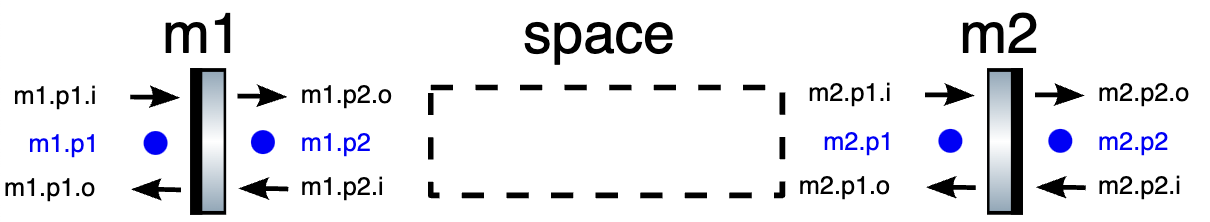

Nodes are accessed using dot (.) notation starting with the component name, e.g., the input node i in the p1 optical port of the second mirror can be accessed with m2.p1.i.

The 'space' is also an optical component because the free propagation changes the phase of the light beam, and anything that changes a property of the light field is treated as a component by definition. A space connects two components via optical ports, e.g., the space above connects the two mirrors with nodes m1.p2 and m2.p1.

**Simulation = running the model/producing output/making plots**

Then we can run the built model, for example looking at an output signal when varying an input parameter, e.g., a mirror position. An optical system can have many output signals, most of which are the signals of photodetectors. Thus, in Finesse, a typical simulation task is defined by:

*   creating the optical model by specifying the components
*   adding the desired detectors to create output signals
*   varying a parameter (using the Xaxis action)




#Building a first model

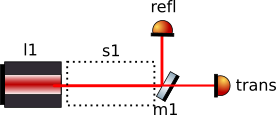

The above figure was made using [component Library](http://www.gwoptics.org/ComponentLibrary/). The figure is just to show the setup graphically and it is not related to building or running a Finesse model. However it helps visualizing how the system works.

In [3]:
# Here we are building the model
simple_mirror = finesse.Model()
simple_mirror.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    laser l1 P=1

    # add a mirror with certain reflectance and transmittance
    mirror m1 R=0.8 T=0.2

    # Space attaching l1 <-> m1 with length of 1 m.
    space s1 l1.p1 m1.p1 L=1

    # Power detectors on reflection and transmission paths
    power_detector_dc refl m1.p1.o
    power_detector_dc trans m1.p2.o
    """
)

The list of various elements that can be built/used are available at the [description page](https://finesse.ifosim.org/docs/develop/kat-elementindex.html).

As a specific example, let us look at the [mirror element](https://finesse.ifosim.org/docs/develop/usage/elements/optics/mirror.html#kat-element-mirror).

# Define action(s)

In [4]:
simple_mirror.parse(
    """
    xaxis(l1.P, lin, 1, 10, 100)
    """
)

The list of various actions/analyses that can be used is available at [this page](https://finesse.ifosim.org/docs/develop/kat-analysisindex.html).

# Run the model

In [5]:
out = simple_mirror.run()

The outputs of the run/analyses are stored in the variable `out`.

# Plot the results

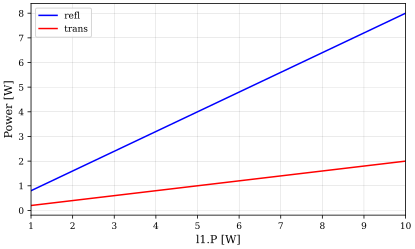

In [6]:
out.plot();

By default Finesse will produce results for all the `detectors` defined in the model for various actions requested.

Above we are using the plotting infrastructure of Finesse itself. But one can also use the native plotting functions of python. For that we need access to the data from the resutls.

# Results data

In [7]:
print(out.outputs)

('refl', 'trans')


In [8]:
print(out["refl"])

[0.8   0.872 0.944 1.016 1.088 1.16  1.232 1.304 1.376 1.448 1.52  1.592
 1.664 1.736 1.808 1.88  1.952 2.024 2.096 2.168 2.24  2.312 2.384 2.456
 2.528 2.6   2.672 2.744 2.816 2.888 2.96  3.032 3.104 3.176 3.248 3.32
 3.392 3.464 3.536 3.608 3.68  3.752 3.824 3.896 3.968 4.04  4.112 4.184
 4.256 4.328 4.4   4.472 4.544 4.616 4.688 4.76  4.832 4.904 4.976 5.048
 5.12  5.192 5.264 5.336 5.408 5.48  5.552 5.624 5.696 5.768 5.84  5.912
 5.984 6.056 6.128 6.2   6.272 6.344 6.416 6.488 6.56  6.632 6.704 6.776
 6.848 6.92  6.992 7.064 7.136 7.208 7.28  7.352 7.424 7.496 7.568 7.64
 7.712 7.784 7.856 7.928 8.   ]


# Plots using the python plotting infrastructure

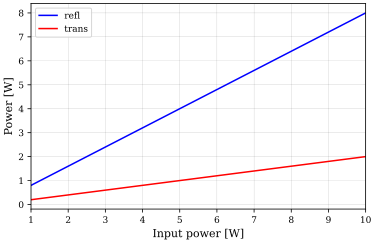

In [9]:
import matplotlib.pyplot as plt
plt.plot(out.x[0], out["refl"],label='refl')
plt.plot(out.x[0], out["trans"],label='trans')
plt.ylabel('Power [W]')
plt.xlabel('Input power [W]')
plt.legend()
plt.show()

# <font color='brown'> Question: Do the results agree with what we expect? <font>

- The detector on the reflected path receives more power because the reflectance of the mirror is more than the transmittance.
- The sum of the measured powers seems to equal to input power of the laser

In [ ]:
plt.plot(out.x[0], out["refl"]+out["trans"],marker='o',label='sum of powers')
plt.plot(out.x[0], out.x[0], label='input laser power')
plt.ylabel('Power [W]')
plt.xlabel('Input power [W]')
plt.legend()
plt.show()

# <font color='blue'> TASK: Change the reflectance and transmission: to 50% - 50% and regenerate the plots <font>

# Ports and nodes

As example a mirror has two ports corresponding to the two sides of a mirror. A port can have one or more nodes, corresonding to the direction of the flow of information (in this case laser light). Now let's look at the input nodes of ports (sides) p1 and p2.

In [12]:
# Here we are building the model
simple_mirror = finesse.Model()
simple_mirror.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    laser l1 P=1

    # add a mirror with certain reflectance and transmittance
    mirror m1 R=0.5 T=0.5

    # Space attaching l1 <-> m1 with length of 1 m.
    space s1 l1.p1 m1.p1 L=1

    # Power detectors on reflection and transmission paths
    power_detector_dc refl m1.p1.i
    power_detector_dc trans m1.p2.i

    xaxis(l1.P, lin, 1, 10, 100)
    """
)

# <font color='brown'> Question: What do we expect to see on the input ports? <font>
- Input laser power on the `i` node of the `refl` (p1) port
- No laser power on the `i` node of the `trans` (p2) port

In [ ]:
out = simple_mirror.run()
plt.plot(out.x[0], out["refl"],marker='o',label='refl')
plt.plot(out.x[0], out["trans"], label='trans')
plt.ylabel('Power [W]')
plt.xlabel('Input power [W]')
plt.legend()
plt.show()

# Using beam splitter element instead mirror element

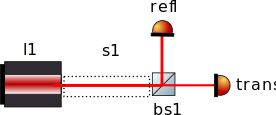

In [ ]:
# Here we are building the model
simple_mirror = finesse.Model()
simple_mirror.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    laser l1 P=1

    # add a mirror with certain reflectance and transmittance
    bs bs1 R=0.5 T=0.5

    # Space attaching l1 <-> m1 with length of 1 m.
    space s1 l1.p1 bs1.p1 L=1

    # Power detectors on reflection and transmission paths
    power_detector_dc refl bs1.p2.o
    power_detector_dc trans bs1.p3.o

    xaxis(l1.P, lin, 1, 10, 100)
    """
)
out = simple_mirror.run()
plt.plot(out.x[0], out["refl"],marker='o',label='refl')
plt.plot(out.x[0], out["trans"], label='trans')
plt.ylabel('Power [W]')
plt.xlabel('Input power [W]')
plt.legend()
plt.show()